In [6]:
!pip3 install -r requirements.txt

INFO: pip is looking at multiple versions of langchain-groq to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_groq-0.3.2-py3-none-any.whl.metadata (2.6 kB)
  Attempting uninstall: langchain-groq
    Found existing installation: langchain-groq 0.1.10
    Uninstalling langchain-groq-0.1.10:
      Successfully uninstalled langchain-groq-0.1.10

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [7]:
import requests
from langchain.tools import tool
from langchain_community.utilities import  SerpAPIWrapper, GoogleSerperAPIWrapper
from langgraph.graph import MessagesState, StateGraph, END, START
from langgraph.prebuilt import ToolNode, tools_condition
from typing import Union
from datetime import date, datetime
from pydantic import BaseModel
from langchain_groq import ChatGroq
from langchain_community.tools.tavily_search import TavilySearchResults


In [8]:
import os
from dotenv import load_dotenv

load_dotenv()

True

# Configure API keys

In [9]:
os.environ["SERP_API_KEY"] = os.getenv("SERP_API_KEY")
os.environ["OPENWEATHER_API_KEY"] = os.getenv("OPENWEATHER_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")
os.environ["EXCHANGE_API_KEY"] = os.getenv("EXCHANGE_RATE_API")

## Weather Tool

In [11]:
@tool 
def get_current_weather(target_location : str):

    """
    Retrieves the current weather conditions for a specified location using SerpAPI.

    This tool performs a real-time Google search to obtain up-to-date weather 
    information such as temperature, humidity, wind, and general conditions 
    (e.g., sunny, cloudy, raining) for any given city, region, or country. It is 
    particularly useful for users planning travel, outdoor activities, or simply 
    checking the weather in another location.

    Parameters:
    - target_location (str): The name of the city, town, region, or country 
    for which the current weather data is to be fetched.

    Returns:
    - str: A string containing the current weather information as returned 
    by the search result.
    """
    
    google_search = SerpAPIWrapper(serpapi_api_key=os.environ["SERP_API_KEY"])

    search_query = f"What is the current weather in {target_location}."

    current_weather = google_search.run(search_query)

    return current_weather 

@tool 
def get_weather_forecast(location : str , time : Union[str, date, datetime]) : 

    """
    Fetches the weather forecast for a given location and time using SerpAPI search results.

    Parameters:
        location (str): The name of the location for which the weather forecast is required.
        time (Union[str, date, datetime]): The time or date (as a string, date, or datetime object) for which the weather forecast is to be retrieved.

    Returns:
        str: The predicted weather conditions as retrieved from the search results.

    Note:
        This function constructs a natural language query and uses the SerpAPIWrapper to fetch weather predictions via a Google search.
    """


    search_query = (
        f"Detailed weather forecast for {location} on {time}, including temperature, chance of rain, "
        f"humidity, wind speed, UV index, sunrise and sunset times, and overall weather conditions"
    )

    google_search = SerpAPIWrapper(serpapi_api_key=os.environ["SERP_API_KEY"])


    predicted_weather = google_search.run(search_query)

    return predicted_weather 

In [38]:
# Manually Testing the tool
# get_current_weather.invoke("What is the current weather in Chennai?")
# get_weather_forecast({
#     "location": "Chennai",
#     "time": "2025-06-20"
# })

## Search Hotel Tools

In [12]:
@tool
def search_hotels(city: str, budget: int) -> str:
    """search hotel in the city under the user budget
    Args:
        city: str (which city user want to travel)
        budget: int (how much money user want to pay for hotel)
    
    output: it will provide some hotel name and cost such as day or week or the hotel policy wise.
    
    
    """
    search = GoogleSerperAPIWrapper()
    
    query = f"best hotel in {city} under ${budget}"
    
    response = search.run(query)
    return response


search_hotels.invoke(
    {
        "city": "Chennai",
        "budget": 100
    }
)
    

'Cheap Hotels in Chennai (Madras) · 1. ibis Chennai Sipcot Hotel · 2. Taz Kamar Inn · 3. New Woodlands Hotel · 4. Green Meadows Resort · 5. Top rated cheap hotels in Chennai include ITC Grand Chola, a Luxury Collection Hotel, Chennai, HOTEL Akmg Towers and Taj Coromandel based on user reviews. Budget Hotels in Chennai · Showing Properties in Chennai. 4.3Excellent(1120 Ratings) · 3.6Very Good(3708 Ratings). Ginger Chennai, Vadapalani · WHITES INN NEARBY ... Hunting for the cheapest hotels in Chennai? Check out these 54 budget hotels starting from S$108 which are highly recommended by our users. Some of the best cheap hotels in Chennai include The Park Chennai, Clarion Hotel President, ibis Chennai Sipcot Hotel - An Accor Brand, and Savera. These hotels ... Looking for Chennai Hotel? 2-star hotels from S$ 12, 3 stars from S$ 22 and 4 stars+ from S$ 21. Stay at Mallika Residency from S$ 20/night, S4 Residency ... Cheap hotels in Chennai · Super Hotel O Triplicane formerly Park Royal · Taj

## HOTEL ESTIMATE

In [13]:

@tool
def estimate_hotel_cost(price_per_night: float, total_days: int) -> float:
    """Estimate total hotel cost based on price per night and number of days.
    
    price_per_night: float (description="Price per night of the selected hotel in USD")
    total_days: int (description="Total number of days the user will stay")
    
    """
    try:
        return round(price_per_night * total_days, 2)
    except Exception as e:
        return str(e)


estimate_hotel_cost.invoke({
    "price_per_night": 1000,
    "total_days": 4
})

4000.0

## TOURIST ATTRACTION

In [ ]:
@tool
def search_attractions(city: str) -> str:
    """
    Search top tourist attractions in a given city.

    Args:
        city (str): Name of the city to search for tourist attractions.

    Returns:
        str: A list of top tourist attractions or places of interest.
    """
    search = TavilySearchResults(k=5)
    results = search.invoke(f"top tourist attractions in {city}")
    return "\n".join([r["content"] for r in results])

search_attractions("Delhi")

/var/folders/2h/sjyl9z_s50v8pl2446pvqjrw0000gn/T/ipykernel_75002/3144328290.py:16: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  search_attractions("Delhi")
/var/folders/2h/sjyl9z_s50v8pl2446pvqjrw0000gn/T/ipykernel_75002/3144328290.py:12: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search = TavilySearchResults(k=5)


'*   [(Top)](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#)\n*   [1 Government buildings](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#Government_buildings)\n    \n*   [2 Connaught Place](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#Connaught_Place)\n    \n*   [3 Historic sites](https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Delhi#Historic_sites) [...] *   [ISKCON Temple](https://en.wikipedia.org/wiki/ISKCON_Temple_Delhi "ISKCON Temple Delhi")\n*   [Jama Masjid](https://en.wikipedia.org/wiki/Jama_Masjid,_Delhi "Jama Masjid, Delhi")\n*   [Laxminarayan Temple](https://en.wikipedia.org/wiki/Laxminarayan_Temple "Laxminarayan Temple")\n*   [Lotus Temple](https://en.wikipedia.org/wiki/Lotus_Temple "Lotus Temple")\n*   [Nizamuddin Dargah](https://en.wikipedia.org/wiki/Nizamuddin_Dargah "Nizamuddin Dargah") [...] *   [Central Park (Sunder Nursery)](https://en.wikipedia.org/wiki/Sunder_Nursery "Sunder Nursery")\n*  

## RESTAURANTS

In [15]:
@tool
def search_restaurants(city: str) -> str:
    """
    Search the best restaurants in a given city.

    Args:
        city (str): Name of the city to search for restaurants.

    Returns:
        str: A list of popular restaurants to try.
    """
    tavily = TavilySearchResults(k=5)
    results = tavily.invoke(f"best restaurants to try in {city}")
    return "\n".join([r["content"] for r in results])

search_restaurants("Chennai")

'[1. The Reef](https://www.tripadvisor.com/Restaurant_Review-g304556-d15142135-Reviews-The_Reef-Chennai_Madras_Chennai_District_Tamil_Nadu.html)\n\n4.9\n\n[(2,019 reviews)](https://www.tripadvisor.com/Restaurant_Review-g304556-d15142135-Reviews-The_Reef-Chennai_Madras_Chennai_District_Tamil_Nadu.html#REVIEWS)\n\nIndian, International$$$$\n\nOpen now [...] [25. Avartana](https://www.tripadvisor.com/Restaurant_Review-g304556-d12270167-Reviews-Avartana-Chennai_Madras_Chennai_District_Tamil_Nadu.html)\n\n4.9\n\n[(812 reviews)](https://www.tripadvisor.com/Restaurant_Review-g304556-d12270167-Reviews-Avartana-Chennai_Madras_Chennai_District_Tamil_Nadu.html#REVIEWS)\n\nIndian$$$$\n\nClosed now [...] [16. Hamsa](https://www.tripadvisor.com/Restaurant_Review-g304556-d10781673-Reviews-Hamsa-Chennai_Madras_Chennai_District_Tamil_Nadu.html)\n\n4.1\n\n[(102 reviews)](https://www.tripadvisor.com/Restaurant_Review-g304556-d10781673-Reviews-Hamsa-Chennai_Madras_Chennai_District_Tamil_Nadu.html#REVIEWS)

# ACTIVITIES AND TRANSPORT

In [18]:

@tool
def search_activities(city: str) -> str:
    """
    Search top activities or things to do in a city.

    Args:
        city (str): Name of the city to search for fun activities.

    Returns:
        str: A list of popular activities or experiences in the city.
    """
    tavily = TavilySearchResults(k=5)
    results = tavily.run(f"fun activities to do in {city}")
    return "\n".join([r["content"] for r in results])

@tool
def search_transportation(city: str) -> str:
    """
    Search transportation options in a city.

    Args:
        city (str): Name of the city to search for transport details.

    Returns:
        str: Transportation options like bus, metro, taxi, and car rental.
    """
    
    tavily = TavilySearchResults(k=5)
    results = tavily.run(f"list of transportation options in {city} for tourists")
    return "\n".join([r["content"] for r in results])


search_transportation("banglore")

'**Transport in [Bengaluru](https://en.wikipedia.org/wiki/Bengaluru "Bengaluru")** consists of several intracity commute modes such as [BMTC](https://en.wikipedia.org/wiki/Bangalore_Metropolitan_Transport_Corporation "Bangalore Metropolitan Transport Corporation") buses, [Namma Metro](https://en.wikipedia.org/wiki/Namma_Metro "Namma Metro") rail services, taxis and [auto rickshaws](https://en.wikipedia.org/wiki/Auto_rickshaws "Auto rickshaws"), as well as several intercity forms of transport: [...] *   [(Top)](https://en.wikipedia.org/wiki/Transport_in_Bengaluru#)\n*   [1 Intracity](https://en.wikipedia.org/wiki/Transport_in_Bengaluru#Intracity)Toggle Intracity subsection\n    *   [1.1 Road](https://en.wikipedia.org/wiki/Transport_in_Bengaluru#Road)\n        *   [1.1.1 Private and rental vehicles](https://en.wikipedia.org/wiki/Transport_in_Bengaluru#Private_and_rental_vehicles)\n\n        *   [1.1.2 Buses](https://en.wikipedia.org/wiki/Transport_in_Bengaluru#Buses) [...] *   [1.1.3 Tax

## EXCHANGE RATE API

In [19]:
@tool
def get_conversion_factor(base_currency: str, target_currency: str) -> float:
    """
    Fetch the currency conversion rate between two currencies.

    Args:
        base_currency (str): The code of the base currency (e.g., 'USD').
        target_currency (str): The code of the currency to convert to (e.g., 'BDT').

    Returns:
        float: The conversion rate from base_currency to target_currency.
    """
    url = f"https://v6.exchangerate-api.com/v6/{EXCHANGE_API_KEY}/pair/{base_currency}/{target_currency}"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code == 200 and data.get("conversion_rate"):
        return float(data["conversion_rate"])
    else:
        raise ValueError(f"Failed to get conversion rate: {data}")
    
@tool
def convert_currency(amount: float, conversion_rate: float) -> float:
    """
    Convert an amount from base currency to target currency using a conversion rate.

    Args:
        amount (float): Amount in base currency.
        conversion_rate (float): Conversion rate to target currency.

    Returns:
        float: Amount in target currency.
    """
    return round(amount * conversion_rate, 2)

## ARTHIMETIC OPERATIONS

In [20]:
@tool
def add(a: float, b: float) -> float:
    """
    Add two numbers.

    Args:
        a (float): First number.
        b (float): Second number.

    Returns:
        float: The sum of a and b.
    """
    return round(a + b, 2)


@tool
def multiply(a: float, b: float) -> float:
    """
    Multiply two numbers.

    Args:
        a (float): First number.
        b (float): Second number.

    Returns:
        float: The product of a and b.
    """
    return round(a * b, 2)


@tool
def calculate_total_cost(hotel_cost: float, activity_cost: float, transport_cost: float) -> float:
    """
    Calculate the total cost of the trip.

    Args:
        hotel_cost (float): Total hotel cost.
        activity_cost (float): Total activity/entertainment cost.
        transport_cost (float): Total transportation cost.

    Returns:
        float: Combined total trip cost.
    """
    return round(hotel_cost + activity_cost + transport_cost, 2)


@tool
def calculate_daily_budget(total_cost: float, days: int) -> float:
    """
    Calculate daily budget based on total cost and number of days.

    Args:
        total_cost (float): Total expense for the trip.
        days (int): Total number of travel days.

    Returns:
        float: Estimated daily budget.
    """
    if days <= 0:
       raise ValueError("Days must be greater than zero.")
    return round(total_cost / days, 2)

In [21]:
SYSTEM_PROMPT = """

You are an AI Travel Agent & Expense Planner. Your job is to help users plan their trips to any city in the world using real-time data and intelligent tools.

You must:
1. Understand the user's travel intent (destination, duration, interests).
2. Decide which tools to call and in what order based on the request.
3. Use tools to fetch:
   - Real-time weather (current or forecast)
   - Local attractions, restaurants, activities, transportation
   - Hotel options and estimate total hotel cost
   - Add or multiply costs to calculate total and daily budget
   - Convert total cost to user's currency using real-time exchange rate
   - Generate a day-by-day itinerary
   - Generate a final summary of the full trip plan

Available tools:
- `get_current_weather`: Get today's weather for a city.
- `get_weather_forecast`: Get multi-day forecast for a city.
- `search_hotels`: Find hotels in a city.
- `estimate_hotel_cost`: Estimate total hotel cost from daily rate and number of days.
- `search_attractions`: Find popular tourist spots.
- `search_restaurants`: Find popular local restaurants.
- `search_activities`: Find local activities (tours, events, etc.).
- `search_transportation`: List available transportation options.
- `add`: Add multiple cost values.
- `multiply`: Multiply values (e.g., cost per day × days).
- `calculate_total_cost`: Aggregate final trip cost.
- `get_conversion_factor`: Get real-time exchange rate.
- `convert_currency`: Convert final trip cost to user's native currency.

Instructions:
- Select tools one at a time based on user input and context.
- Use memory to store important variables like destination, duration, cost breakdowns, currency, etc.
- Once all data is gathered, generate a full day-by-day itinerary.
- Summarize the travel plan including location, dates, weather, top places, cost in native currency, and a final recommendation.

End Goal:
Return a **complete travel plan** including:
- Weather conditions
- Recommended attractions, activities, and restaurants
- Hotel options and total cost
- Currency conversion and daily/total budget
- Day-wise itinerary
- Final natural language summary

Be informative, helpful, and always rely on tools for real-time or factual data.
"""

In [22]:
tools = [
    get_current_weather,         # Fetches current weather data
    get_weather_forecast,        # Retrieves multi-day weather forecast
    search_hotels,               # Lists hotels based on city & preference
    estimate_hotel_cost,         # Calculates hotel cost (per day × days)
    search_attractions,          # Lists top tourist spots
    search_restaurants,          # Finds popular local eateries
    search_activities,           # Fetches nearby activities & events
    search_transportation,       # Provides local travel options
    add,                         # Adds multiple numerical values
    multiply,                    # Multiplies values (used in cost calcs)
    calculate_total_cost,        # Computes final cost (aggregates all)
    get_conversion_factor,       # Gets real-time currency exchange rate
    convert_currency             # Converts final cost to user’s currency
]


In [23]:
llm = ChatGroq(model="qwen/qwen3-32b")

In [24]:
llm_with_tools = llm.bind_tools(tools)

In [25]:
llm_with_tools.invoke(
    "Hi, I want to take a 5-day trip to London next month. My hotel budget is around $100 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in INR . Also, I prefer local food and public transportation. Can you plan it all for me?"
)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '3hafq91d0', 'function': {'arguments': '{"location":"London, UK","time":"2023-10"}', 'name': 'get_weather_forecast'}, 'type': 'function'}, {'id': '3k5b6ww6j', 'function': {'arguments': '{"budget":100,"city":"London"}', 'name': 'search_hotels'}, 'type': 'function'}, {'id': '2mvbsnmp1', 'function': {'arguments': '{"city":"London"}', 'name': 'search_attractions'}, 'type': 'function'}, {'id': 'fr2czef7e', 'function': {'arguments': '{"city":"London"}', 'name': 'search_restaurants'}, 'type': 'function'}, {'id': '9fcp0ahv0', 'function': {'arguments': '{"city":"London"}', 'name': 'search_transportation'}, 'type': 'function'}, {'id': 'h056f5yxd', 'function': {'arguments': '{"price_per_night":100,"total_days":5}', 'name': 'estimate_hotel_cost'}, 'type': 'function'}, {'id': '3de3bgn0j', 'function': {'arguments': '{"base_currency":"USD","target_currency":"INR"}', 'name': 'get_conversion_factor'}, 'type': 'function'}]}, response_metadat

In [26]:
def call_model(state: MessagesState):
    question = state["messages"]
    
    question_with_system_prompt = [SYSTEM_PROMPT] + question
    
    response = llm_with_tools.invoke(question_with_system_prompt)
    
    return {
        "messages": [response]
    }

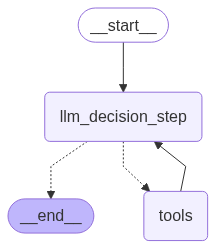

In [27]:

builder = StateGraph(MessagesState) 

builder.add_node("llm_decision_step", call_model)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "llm_decision_step")
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition
)
builder.add_edge("tools", "llm_decision_step")

travel_agent = builder.compile()

from IPython.display import display, Image

display(Image(travel_agent.get_graph().draw_mermaid_png()))

In [28]:
input = "Hi, I want to take a 5-day trip to London next month. My hotel budget is around $100 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in INR . Also, I prefer local food and public transportation. Can you plan it all for me?"

In [29]:
output = travel_agent.invoke(
    {
        "messages": [input]
    }
)

for m in output["messages"]:
    m.pretty_print()

================================ Human Message =================================

Hi, I want to take a 5-day trip to London next month. My hotel budget is around $100 per night. I’d like to know what the weather will be like, what places I can visit, and how much the whole trip might cost. I’ll be paying in INR . Also, I prefer local food and public transportation. Can you plan it all for me?
================================== Ai Message ==================================
Tool Calls:
  get_weather_forecast (8r665vv72)
 Call ID: 8r665vv72
  Args:
    location: London
    time: 2024-03-10
================================= Tool Message =================================
Name: get_weather_forecast

['Some clouds this evening will give way to mainly clear skies overnight. Low 61F. Winds ESE at 10 to 15 mph. Humidity64%.', 'Sunny Intervals. 28° 82°. ,. 0%chance of precipitation. ,. Wind speed9 mph14 km/h E 9 mph14 km/hEasterly. , More details. Sunny intervals and a gentle breeze.', 'London 7 

In [30]:
from IPython.display import Markdown

Markdown(output["messages"][-1].content)

### 🗺️ **5-Day London Travel Plan**  
**Budget:** $100/night hotel, local food/public transport, **Total Cost: ~₹76,500 (USD 900)**  

---

#### **Day 1: Arrival & Historic London**  
- **Weather:** 30°F–83°F (variable, pack layers)  
- **Activities:**  
  - Visit the **Tower of London** (entrance: ~£20) and see the Crown Jewels.  
  - Walk across **Tower Bridge** for skyline views.  
  - Dinner at **Borough Market** (local favorites: Pret a Manger, Dishoom).  
- **Stay:** YHA London Earl’s Court (£50/night).  

#### **Day 2: Royal & Cultural Heritage**  
- **Weather:** Partly cloudy, 50°F–65°F.  
- **Activities:**  
  - **Westminster Abbey** (£22) and **Big Ben** (free).  
  - **British Museum** (free)—explore the Rosetta Stone and Egyptian mummies.  
  - Evening pub dinner at **The Churchill Arms** (traditional British fare).  
- **Transport:** Tube (£2.50/ride).  

#### **Day 3: Parks & Royal Residences**  
- **Weather:** Sunny intervals, 60°F–70°F.  
- **Activities:**  
  - **Hyde Park** (free)—row a boat on the Serpentine.  
  - **Kensington Palace** (£19.50) and **Gardens** (free).  
  - Lunch at **Café Royal** (central London).  
- **Stay:** Mama Shelter (£65/night).  

#### **Day 4: Art & Markets**  
- **Weather:** 55°F–70°F, light rain possible.  
- **Activities:**  
  - **National Gallery** (free)—Van Gogh, Turner.  
  - **Covent Garden** (shopping, street performers, and tea at **The Ivy Market Restaurant**).  
  - Evening walk through **Oxford Street** (discounts at Selfridges).  
- **Transport:** Walking + Oyster Card (£15/day cap).  

#### **Day 5: Departure or Day Trip**  
- **Option 1:** **Windsor Castle** (£22.50) and return via train (£10).  
- **Option 2:** **Camden Town** for alternative markets and lunch at **Camden Lock Market**.  

---

### **💰 Cost Breakdown**  
| **Category**         | **USD** | **INR (₹85/USD)** |  
|----------------------|---------|--------------------|  
| Hotels (5 nights)    | $500    | ₹42,500            |  
| Attractions/Tickets  | $150    | ₹12,750            |  
| Food (5 days)        | $250    | ₹21,250            |  
| Transport (Tube/Oyster) | $100  | ₹8,500             |  
| **Total**            | **~$1,000** | **~₹85,000**      |  

---

### **📌 Final Notes**  
1. **Weather Tip:** Bring a light jacket for variable spring temperatures.  
2. **Currency:** Convert USD to INR at ~₹85 (use `convert_currency` for real-time rate).  
3. **Local Faves:** Try **fish and chips** at **Gordon Ramsay’s Pub** or **afternoon tea** at **The Ritz**.  
4. **Transport:** Use contactless payment for Tube/Buses (£1.80/ride).  

**Final Recommendation:** London’s mix of history, culture, and vibrant markets fits your budget! Prioritize free attractions (museums, parks) and plan ahead for ticket discounts (e.g., London Pass). Safe travels! 🚇